In [1]:
# RNN 기반 감성 분류기

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# 하이퍼 파라메터 설정
output_dir =   './model_output/rnn'
epochs = 16
batch_size = 128

# 벡터공간
n_dim = 64
n_unique_words = 10000
max_review_length = 100 # 그레이디언트 소실때문에 낮춤
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#Rnn 층
n_rnn = 256
drop_rnn = 0.2

In [4]:
(x_train,y_train),(x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

In [5]:
x_train[0][:10],y_train[0]

([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65], 1)

In [6]:
for i in range(3):
  print(len(x_train[i]))

218
189
141


In [7]:
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_valid = pad_sequences(x_valid, maxlen=max_review_length)

In [8]:
for i in range(3):
  print(len(x_train[i]))

100
100
100


In [9]:
# 단어를 분리하고 불용어제거하고 이를 원핫이나 또는 단어임베딩을 통해서 수치 데이터로 변경  -imdb
# 문장의 길이를 통일

In [10]:
# 신경망
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length = max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout = drop_rnn))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               82176     
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn import metrics
# 모델설정
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [13]:
# 훈련
model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (x_valid,y_valid),
          callbacks = [checkpoint]
)

Epoch 1/16
196/196 [==============================] - 32s 149ms/step - loss: 0.6883 - accuracy: 0.5329 - val_loss: 0.6544 - val_accuracy: 0.5942
Epoch 2/16
196/196 [==============================] - 29s 147ms/step - loss: 0.6342 - accuracy: 0.6296 - val_loss: 0.6722 - val_accuracy: 0.5928
Epoch 3/16
196/196 [==============================] - 29s 147ms/step - loss: 0.5670 - accuracy: 0.6965 - val_loss: 0.6373 - val_accuracy: 0.6338
Epoch 4/16
196/196 [==============================] - 32s 161ms/step - loss: 0.4817 - accuracy: 0.7620 - val_loss: 0.6108 - val_accuracy: 0.6861
Epoch 5/16
196/196 [==============================] - 29s 149ms/step - loss: 0.4637 - accuracy: 0.7730 - val_loss: 0.6034 - val_accuracy: 0.6670
Epoch 6/16
196/196 [==============================] - 29s 147ms/step - loss: 0.4128 - accuracy: 0.8087 - val_loss: 0.6806 - val_accuracy: 0.6134
Epoch 7/16
196/196 [==============================] - 29s 148ms/step - loss: 0.3474 - accuracy: 0.8480 - val_loss: 0.6917 - val_ac

In [ ]:
# 모델이 로드한 가중치에 해당하는 에포크상태로 변경
# model.load_weights(output_dir+ '')

In [14]:
y_hat = model.predict(x_valid)

782/782 [==============================] - 9s 11ms/step


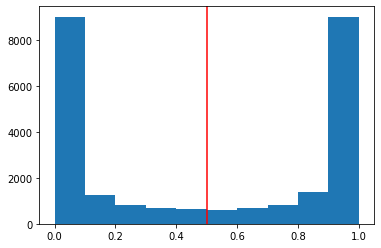

In [16]:
plt.hist(y_hat)
plt.axvline(x = 0.5, color='red')